# PyTorch Workflow

Example of end-to-end PyTorch workflow.

In [3]:
import torch
from torch import nn ## contains all of PyTorch's basic building blocks for graphs. nn = neural network.

import matplotlib.pyplot as plt

torch.__version__

'2.4.0+cu121'

## Data

Preparing and loading data. Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

In [4]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

**One of the most important concepts in machine learning** is creating a training and test set (and when required, a validation set). Ecah split of the dataset serves a specific purpose:

| Split | Purpose | Amount of total data | Occurence |
|-------|---------|----------------------|-----------|
| Training set | The model learns from this data | ~60-80% | Always |
| Validation set | The model gets tuned on this data | ~10-20% | Often but not always |
| Testing set | The model is evaluated on this data | ~10-20% | Always |

In [10]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [36]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

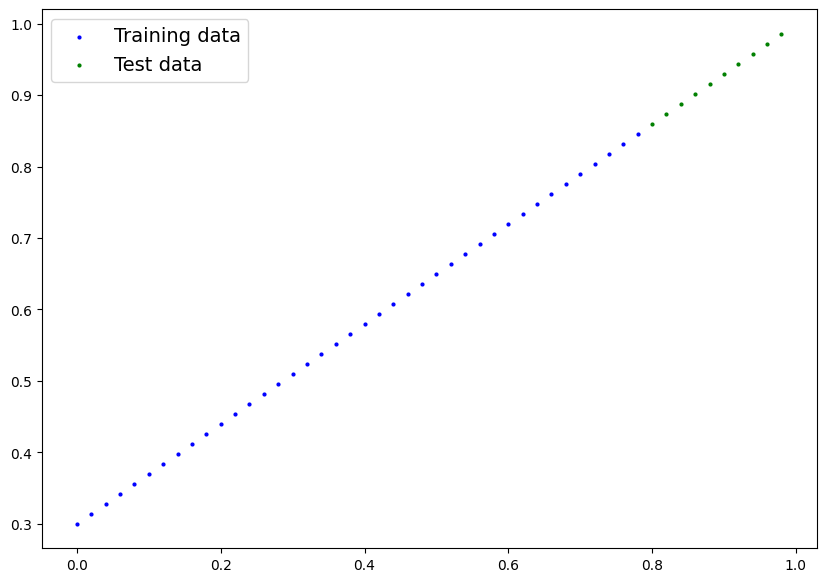

In [14]:
plot_predictions()

## Build

Giving shape to the model. This model does the following:

- Start with random values (weight & bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values.

It does this through two main algorithms:
1. Gradient descent: [https://www.youtube.com/watch?v=IHZwWFHWa-w](https://www.youtube.com/watch?v=IHZwWFHWa-w)
2. Backpropagation: [https://www.youtube.com/watch?v=Ilg3gGewQ5U](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

In [15]:
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor: # should be overriden by every subclass
        return self.weights * x + self.bias # linear regression formula

### Model building essentials

[PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html)

- `torch.nn`, contains all of the buildings for computational graphs.
- `torch.nn.Parameter`, what parameters should our model try and learn, often a PyTorch layer from torch.
- `torch.nn.Module`, the base class for all neural network modules, every subclass should override `Module::forward`.
- `torch.optim`, where the PyTorch optimizers of PyTorch live in.
- `torch.utils.data.Dataset`, represents a map betweekn key (label) and sample (features) pairs of data.
- `torch.utils.data.DataLoader`, creates a Python iterable over a torch Dataset, allowing to iterate over the data.

In [24]:
model_0 = LinearRegressionModel()

print(list(model_0.parameters()))
model_0.state_dict()

[Parameter containing:
tensor([-1.0595], requires_grad=True), Parameter containing:
tensor([-1.5682], requires_grad=True)]


OrderedDict([('weights', tensor([-1.0595])), ('bias', tensor([-1.5682]))])

### Making predictions

When we pass data through the model, it's going to run throughout the `forward` method.

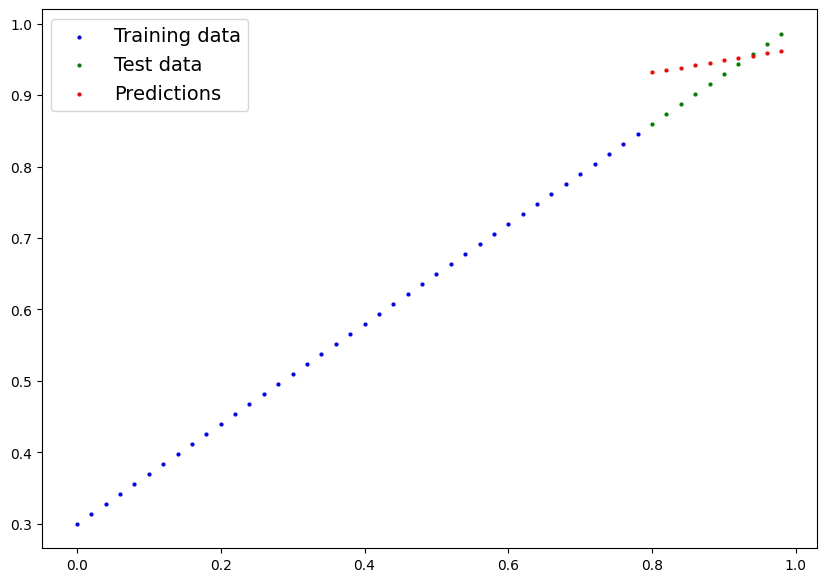

In [42]:
torch.manual_seed(191)
model_1 = LinearRegressionModel()

with torch.inference_mode(): # disables some of the PyTorch optimizations like grad_fn (see: https://x.com/PyTorch/status/1437838231505096708)
    y_preds = model_1(X_test)

plot_predictions(predictions=y_preds)

## Training

Fitting the model to the data.

## Inference

Making predictions and evaluating the model.

## Reusing

Saving and reloading the model.

## Closing

Putting it all together.